In [47]:
import pandas as pd
import matplotlib.pyplot as plt
data=pd.read_csv("data.csv")
headings=list(data.columns)
for i in headings:
  data[i]=[x.strip() if isinstance(x, str) else x for x in data[i]]

# Designation vs Remarks:

<AxesSubplot:xlabel='Designation'>

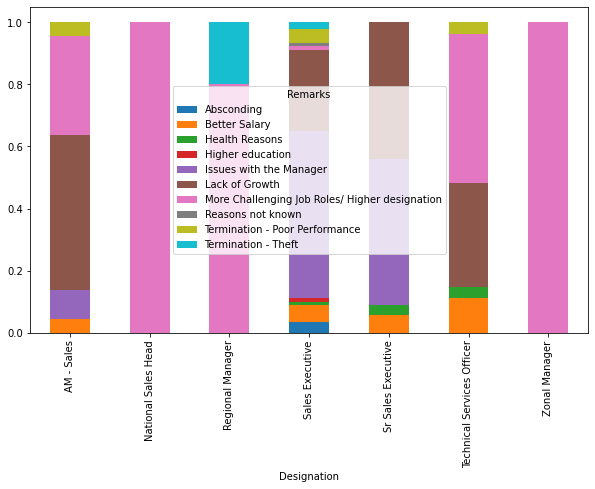

In [48]:
grouped = data.groupby(['Designation', 'Remarks']).size().unstack(fill_value=0)
total = grouped.sum(axis=1)
proportions = grouped.divide(total, axis=0)
fig, ax = plt.subplots(figsize=(10, 6))

proportions.plot(kind='bar', stacked=True, ax=ax)

We can see that 
 

*   A majority of the people in higher roles (National Sales Head, Regional Manager, Zonal Manager) left because of more challenging job roles/higher designations
*   Some of those in intermediate positions (AM, Technical Services Officer) had the same remarks, while the rest mostly left due to lack of growth


*   Most (Sr) Sales Executives that left had issues with the manager, with a few leaving due to lack of growth





# Monthly Income vs Designation & Gender:

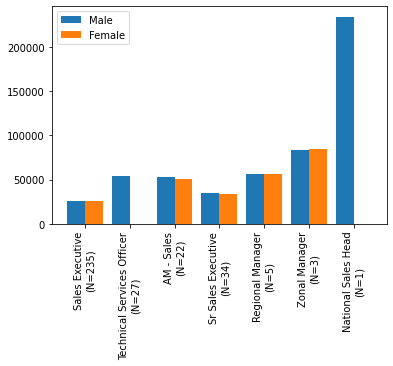

In [49]:
grouped=data.groupby(['Grade', 'Gender'])["Monthly Income"].apply(list)
y1=[]
y2=[]
headings=data["Grade"].unique()
for i in headings:
  if "Male" in grouped[i]:
    y1.append(sum(grouped[i]["Male"])/len(grouped[i]["Male"]))
  else:
    y1.append(0)
  if "Female" in grouped[i]:
    y2.append(sum(grouped[i]["Female"])/len(grouped[i]["Female"]))
  else:
    y2.append(0)
x=list(range(1,len(data["Grade"].unique())+1))
width=0.4
plt.bar([a-width/2 for a in x], y1, width)
plt.bar([a+width/2 for a in x], y2, width)
counts=data.groupby(["Designation"]).count()["S.No"].to_dict()
plt.xticks(range(1,len(data["Designation"].unique())+1), ["{}\n(N={})".format(a,str(counts[a])) for a in data["Designation"].unique()],rotation=90)
#plt.xlabel(data["Designation"].unique(), rotation=90)
plt.legend(["Male", "Female"])
plt.show()



*   Those in managerial roles and TSOs have a higher pay, the order being National Sales Head > Zonal Manager > Regional Manager > Sr Sales Exec > Sales Exec with TSO somewhere in-between (which makes sense logically) 
*   We can also see that there is no pay gap between males and females in this case!





# Zone-wise Designation vs Remarks

['West' 'South' 'Central' 'North' 'East' 'Ho']


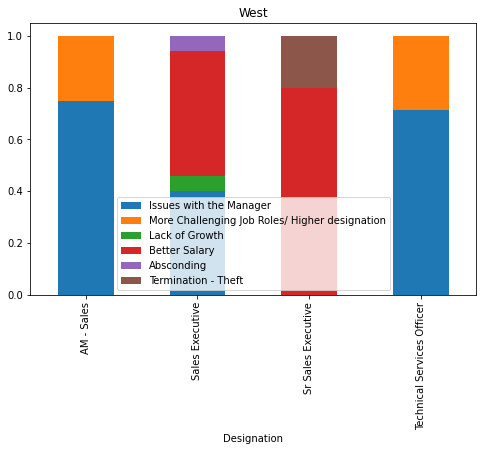

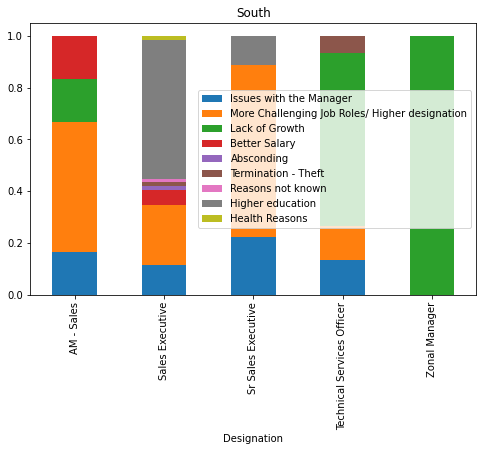

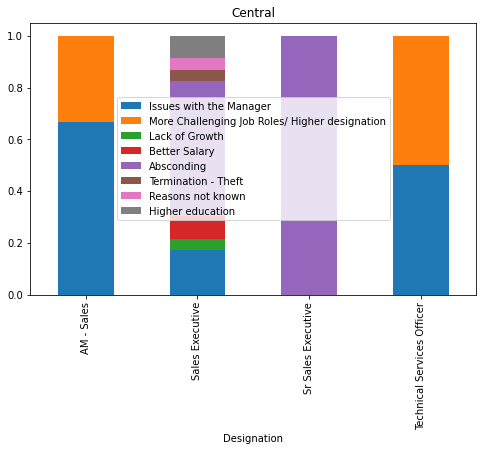

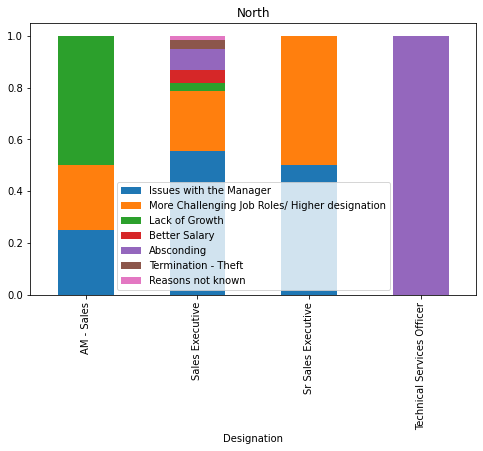

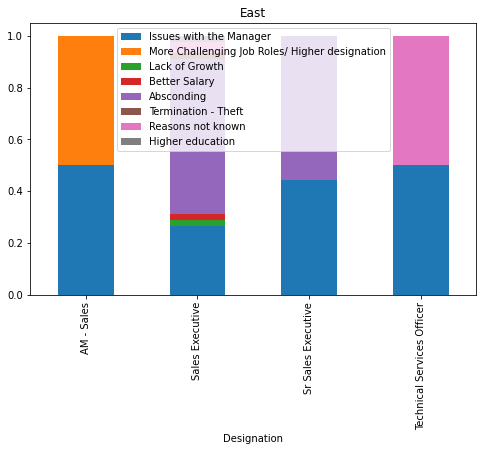

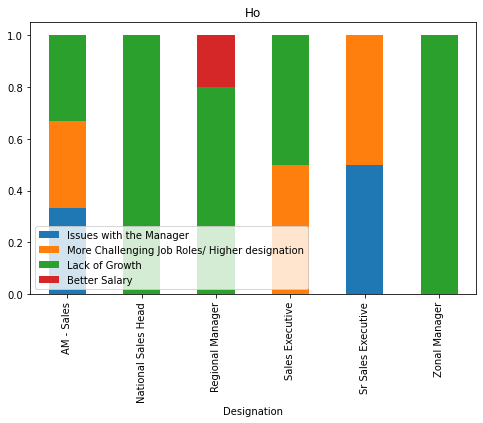

In [50]:
data['Zone']=[x.title() for x in data['Zone']]
grouped = data.groupby(['Zone', 'Designation', 'Remarks']).size()
zones=data['Zone'].unique()
print(zones)
#fig, axs = plt.subplots(3, 2, figsize=(10, 6))
z_remarks={}

for i in range(len(zones)):
  z_remarks=grouped[zones[i]].to_frame().unstack()
  total = z_remarks.sum(axis=1)
  proportions = z_remarks.divide(total, axis=0)
  fig, ax = plt.subplots( figsize=(8, 5))
  proportions.plot(kind='bar', stacked=True, ax=ax, title=zones[i])
  ax.legend(data["Remarks"].unique())

The zone-wise plots can give us better insights as to why employees chose to leave (eg. if many employees from a certain zone left due to issues with the manager, that could mean that the manager is the issue)

- In the West zone, we can see that Sales Execs and Sr Sales Execs were getting better offers which was a major reason for them to leave.
- A majority of the employees who cited higher education as their reason for leaving the company were Sales Execs from the South.
- The zones other than HO, South, and Central had many people leaving due to issues with their managers.